In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
# import the data
profiles = pd.read_csv("data/profiles.csv")
profiles.head(3)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,orientation,sex,smokes,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,NaN,transportation,"south san francisco, california",straight,m,sometimes,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,"oakland, california",straight,m,no,single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,NaN,"san francisco, california",straight,m,no,available


# Task 1

In [13]:
for col in profiles:
    print('-------------------------------- %s --------------------------------' % col)
    if profiles[col].dtype == np.int64:
        print(dict(profiles[col].value_counts(dropna=True)))
    else:
        print(dict(profiles[col].value_counts()))
        print('{Missing Values: %s}' % profiles[col].isnull().values.sum())

-------------------------------- age --------------------------------
{26: 3724, 27: 3685, 28: 3583, 25: 3531, 29: 3295, 24: 3242, 30: 3149, 31: 2735, 23: 2592, 32: 2587, 33: 2206, 22: 1934, 34: 1902, 35: 1755, 36: 1583, 37: 1427, 38: 1330, 21: 1282, 39: 1172, 42: 1072, 40: 1030, 41: 980, 20: 953, 43: 858, 44: 708, 45: 643, 19: 611, 46: 578, 47: 529, 48: 481, 49: 459, 50: 437, 51: 350, 52: 344, 18: 309, 56: 271, 54: 267, 55: 265, 57: 256, 53: 252, 59: 221, 58: 197, 60: 195, 61: 176, 62: 167, 63: 138, 64: 113, 65: 109, 66: 105, 67: 66, 68: 59, 69: 31, 110: 1, 109: 1}
-------------------------------- body_type --------------------------------
{'average': 14652, 'fit': 12711, 'athletic': 11819, 'thin': 4711, 'curvy': 3924, 'a little extra': 2629, 'skinny': 1777, 'full figured': 1009, 'overweight': 444, 'jacked': 421, 'used up': 355, 'rather not say': 198}
{Missing Values: 5296}
-------------------------------- diet --------------------------------
{'mostly anything': 16585, 'anything': 61

{Missing Values: 5512}
-------------------------------- status --------------------------------
{'single': 55697, 'seeing someone': 2064, 'available': 1865, 'married': 310, 'unknown': 10}
{Missing Values: 0}


# Task 2

In [4]:
# categorical variables
categ_vars = ['body_type', 'diet', 'drinks', 'drugs', 'education',
              'ethnicity', 'job', 'location', 'orientation', 'sex',
              'smokes', 'status']

# create dummy variable for categorical variables
categ_dummies = pd.DataFrame()
for var in categ_vars:
    dummies = pd.get_dummies(profiles[var])
    categ_dummies = pd.concat([categ_dummies, dummies], axis = 1)

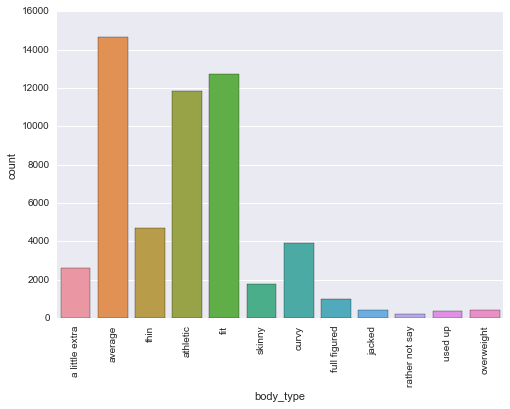

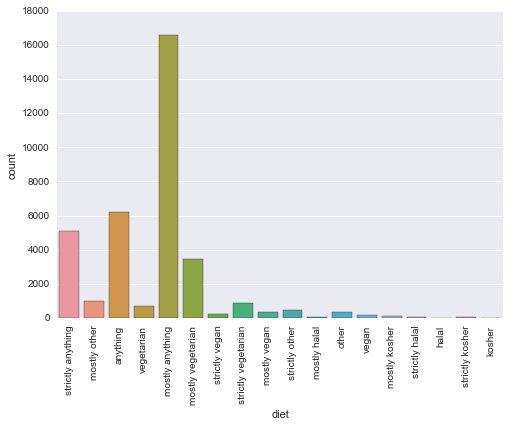

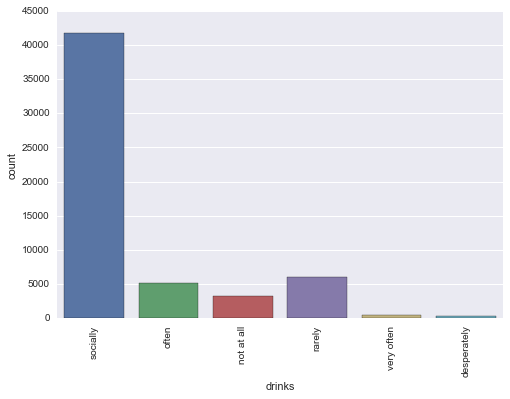

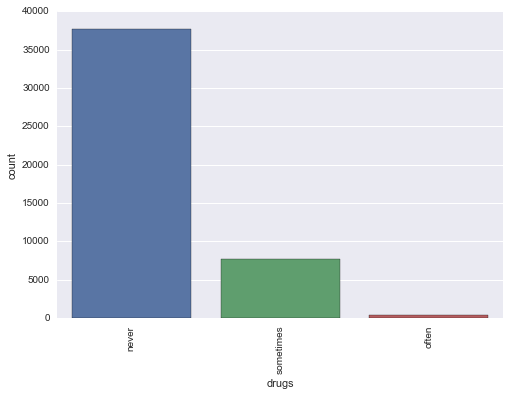

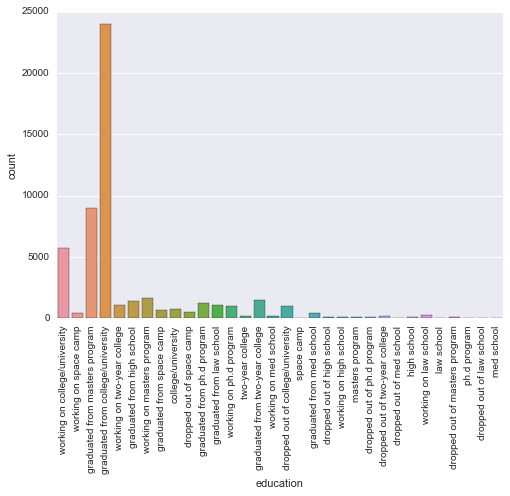

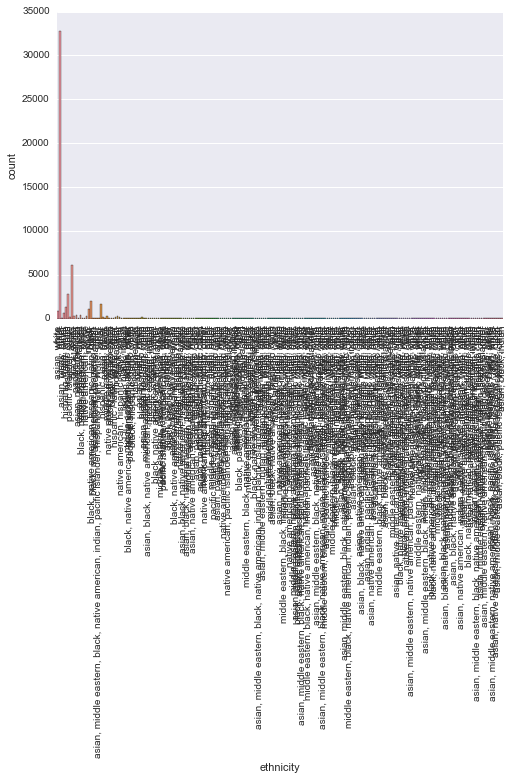

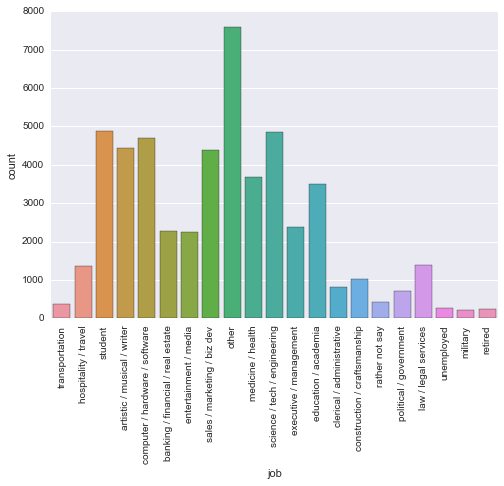

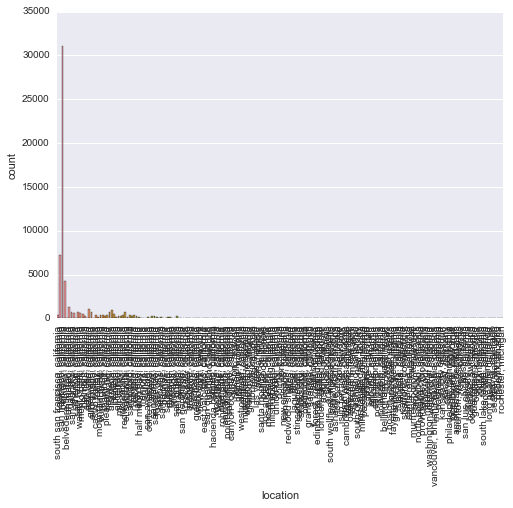

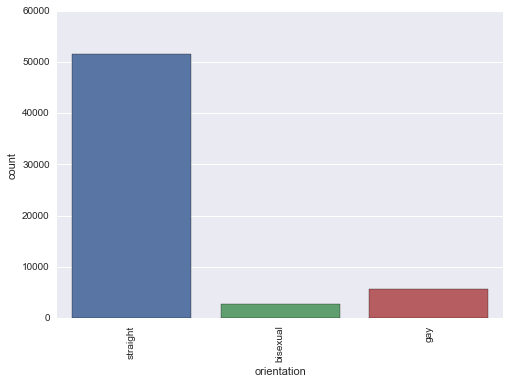

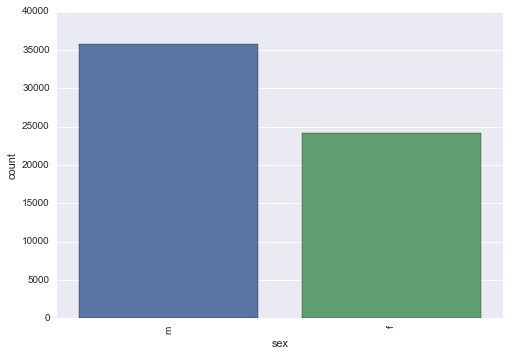

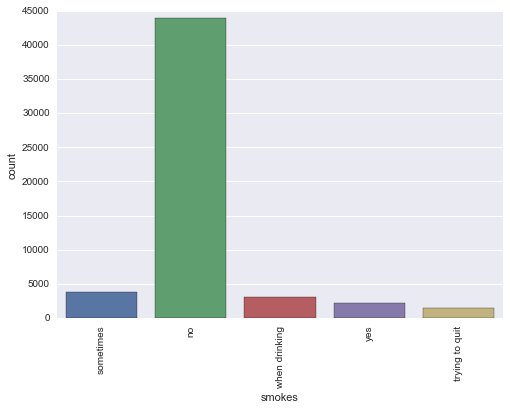

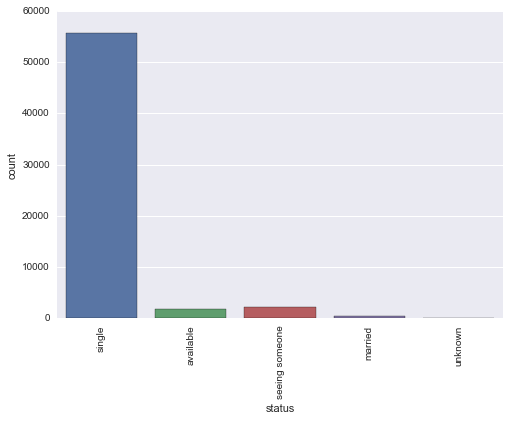

In [12]:
plt.show()
for col in categ_vars:
    g = sns.countplot(x=col, data=profiles)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.show()

# Task 3

In [15]:
categ_dummies = categ_dummies.values

In [16]:
# preprocessing the data
# 1. fill na
# 2. perform normalization
num_profiles = profiles.loc[:, ['age', 'height']]
num_profiles['height'] = num_profiles['height'].fillna(np.mean(num_profiles['height']))
num_profiles = normalize(num_profiles)

In [17]:
# concatenate numerical data and dummy variables of catogorical variables
train = np.concatenate([num_profiles, categ_dummies], axis=1)

In [18]:
# train three k-means models given different clusters (4, 6, 8)
clusters = [4, 6, 8]
mean_mse = []
for n in clusters: 
    kmeans = KMeans(n_clusters=n, random_state=0).fit(train)
    mse = 0
    for i in range(kmeans.n_clusters):
        mse += np.sum(np.square(train[kmeans.labels_ == i, ] - 
                                kmeans.cluster_centers_[i])) / np.bincount(kmeans.labels_)[i]
    mean_mse.append(mse / n)
mean_mse

[5.3372616760708551, 5.0864862634671839, 4.9891782158589608]

# Task 4

In [19]:
# 'full_data' is used to distinguish cluster and the whole dataset  
profiles['full_data'] = 'Yes'

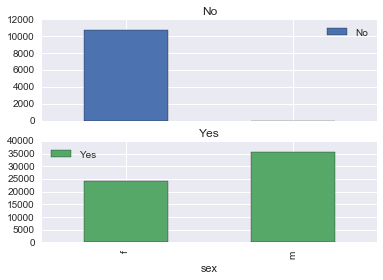

In [20]:
cluster0 = profiles.iloc[kmeans.labels_ == 0, ].copy()
cluster0.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster0])
plt = tmp[['sex', 'full_data']].groupby(['sex','full_data']).size().unstack(1).plot(kind='bar', subplots=True)

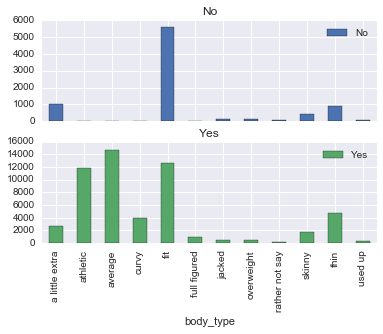

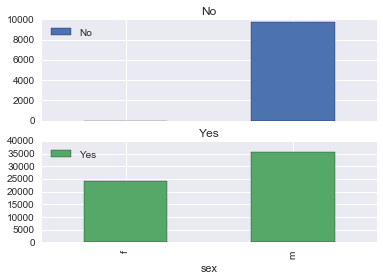

In [21]:
cluster1 = profiles.iloc[kmeans.labels_ == 1, ].copy()
cluster1.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster1])
for col in ['body_type', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)

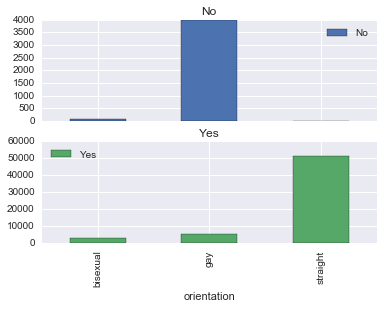

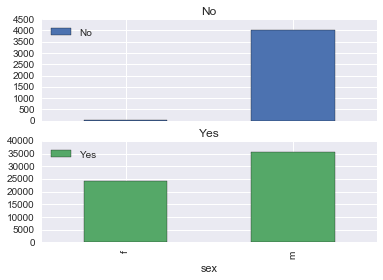

In [22]:
cluster2 = profiles.iloc[kmeans.labels_ == 2, ].copy()
cluster2.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster2])
for col in ['orientation', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)

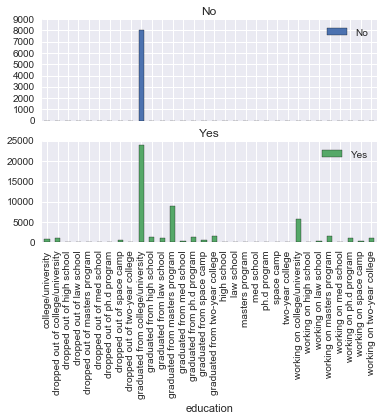

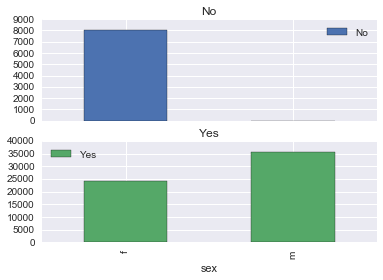

In [23]:
cluster3 = profiles.iloc[kmeans.labels_ == 3, ].copy()
cluster3.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster3])
for col in ['education', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)

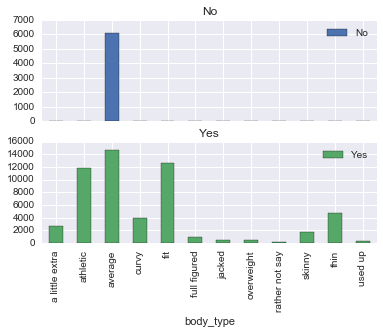

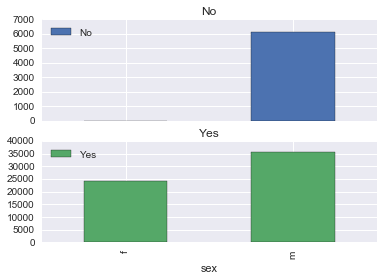

In [24]:
cluster4 = profiles.iloc[kmeans.labels_ == 4, ].copy()
cluster4.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster4])
for col in ['body_type', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)

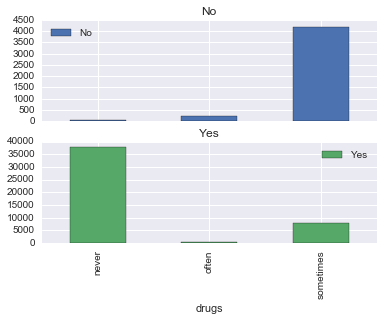

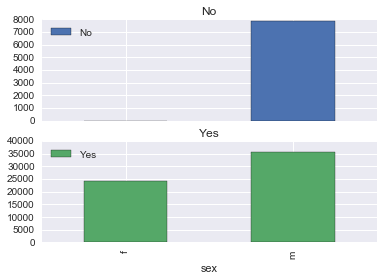

In [25]:
cluster5 = profiles.iloc[kmeans.labels_ == 5, ].copy()
cluster5.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster5])
for col in ['drugs', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)

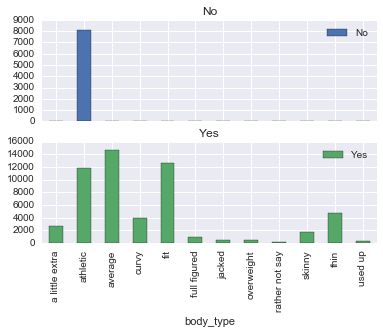

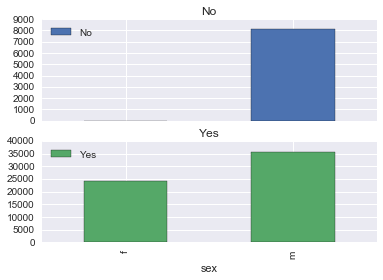

In [26]:
cluster6 = profiles.iloc[kmeans.labels_ == 6, ].copy()
cluster6.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster6])
for col in ['body_type', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)

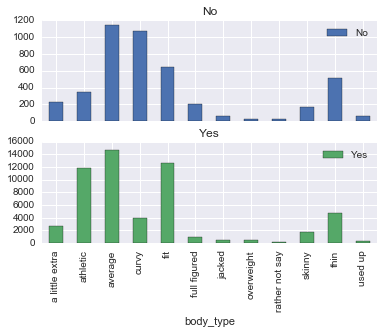

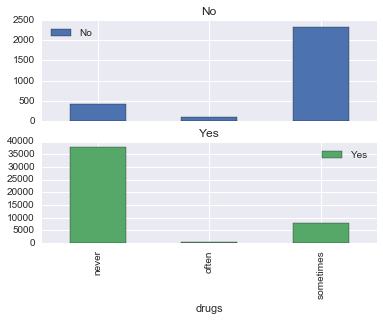

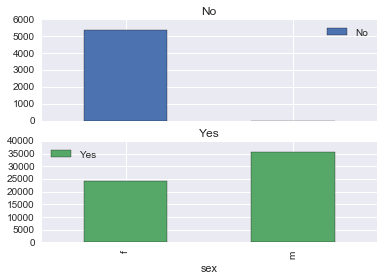

In [27]:
cluster7 = profiles.iloc[kmeans.labels_ == 7, ].copy()
cluster7.loc[:, 'full_data'] = 'No'
tmp = pd.concat([profiles, cluster7])
for col in ['body_type', 'drugs', 'sex']:
    plt = tmp[[col, 'full_data']].groupby([col,'full_data']).size().unstack(1).plot(kind='bar', subplots=True)